In [1]:
# Installs the latest version of the Qiskit meta-package for circuit creation.
!pip install qiskit -U

In [2]:
!pip install qiskit-ibm-runtime -U

In [3]:
!pip install pylatexenc

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_cloud", token="", instance="")


In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

def create_vvqc(num_qubits, depth):
    """Create a variable depth quantum circuit.

    Args:
        num_qubits (int): Number of qubits in the circuit.
        depth (int): Depth of the quantum circuit (number of layers of gates).

    Returns:
        QuantumCircuit: The constructed variable depth quantum circuit.
    """
    qc = QuantumCircuit(num_qubits)

    for d in range(depth):
        for q in range(num_qubits):
            qc.h(q)  # Apply Hadamard gate
            qc.cx(q, (q + 1) % num_qubits)  # Apply CNOT gate (modulo for cyclic connections)

    qc.measure_all()
    return qc

def visualize_circuit(circuit):
    """Visualize the quantum circuit.

    Args:
        circuit (QuantumCircuit): The quantum circuit to be visualized.

    Returns:
        None
    """
    # Display the circuit diagram
    print(circuit.draw())

# Example usage
num_qubits = 3  # Number of qubits
depth = 5  # Depth of the quantum circuit

qc = create_vvqc(num_qubits, depth)
visualize_circuit(qc)


        ┌───┐                    ┌───┐┌───┐                    ┌───┐┌───┐     »
   q_0: ┤ H ├──■─────────────────┤ X ├┤ H ├──■─────────────────┤ X ├┤ H ├──■──»
        └───┘┌─┴─┐┌───┐          └─┬─┘└───┘┌─┴─┐┌───┐          └─┬─┘└───┘┌─┴─┐»
   q_1: ─────┤ X ├┤ H ├──■─────────┼───────┤ X ├┤ H ├──■─────────┼───────┤ X ├»
             └───┘└───┘┌─┴─┐┌───┐  │       └───┘└───┘┌─┴─┐┌───┐  │       └───┘»
   q_2: ───────────────┤ X ├┤ H ├──■─────────────────┤ X ├┤ H ├──■────────────»
                       └───┘└───┘                    └───┘└───┘               »
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                       ┌───┐┌───┐                    ┌───┐┌───┐               »
«   q_0: ───────────────┤ X ├┤ H ├──■─────────────────┤ X ├┤ H ├──■────────────»
«        ┌───┐          └─┬─┘└───┘┌─┴─┐┌───┐          └─┬─┘└───┘┌─┴─┐┌───┐     »
«   q_1: ┤ H ├──■─────────┼───────┤ X

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

def create_ansatz(num_qubits):
    """Create a parameterized ansatz circuit.

    Args:
        num_qubits (int): Number of qubits in the circuit.

    Returns:
        QuantumCircuit: The parameterized ansatz circuit.
    """
    qc = QuantumCircuit(num_qubits)

    # Define parameters
    theta = Parameter('θ')

    # Apply parameterized gates
    for q in range(num_qubits):
        qc.rx(theta, q)  # Apply RX gate with parameter θ
        qc.ry(theta, q)  # Apply RY gate with parameter θ
        qc.cz(q, (q + 1) % num_qubits)  # Apply CZ gate

    return qc

def create_vvqc_with_ansatz(num_qubits, depth):
    """Create a variable depth quantum circuit using a canonical ansatz.

    Args:
        num_qubits (int): Number of qubits in the circuit.
        depth (int): Depth of the quantum circuit (number of repetitions of the ansatz).

    Returns:
        QuantumCircuit: The constructed variable depth quantum circuit.
    """
    base_circuit = create_ansatz(num_qubits)
    qc = QuantumCircuit(num_qubits)

    # Add the ansatz circuit multiple times
    for _ in range(depth):
        qc.append(base_circuit, range(num_qubits))

    qc.measure_all()
    return qc

def visualize_circuit(circuit):
    """Visualize the quantum circuit.

    Args:
        circuit (QuantumCircuit): The quantum circuit to be visualized.

    Returns:
        None
    """
    # Display the circuit diagram
    print(circuit.draw())

# Example usage
num_qubits = 3  # Number of qubits
depth = 4  # Depth of the quantum circuit

qc = create_vvqc_with_ansatz(num_qubits, depth)
visualize_circuit(qc)


        ┌─────────────────┐┌─────────────────┐┌─────────────────┐»
   q_0: ┤0                ├┤0                ├┤0                ├»
        │                 ││                 ││                 │»
   q_1: ┤1 circuit-161(θ) ├┤1 circuit-161(θ) ├┤1 circuit-161(θ) ├»
        │                 ││                 ││                 │»
   q_2: ┤2                ├┤2                ├┤2                ├»
        └─────────────────┘└─────────────────┘└─────────────────┘»
meas: 3/═════════════════════════════════════════════════════════»
                                                                 »
«        ┌─────────────────┐ ░ ┌─┐      
«   q_0: ┤0                ├─░─┤M├──────
«        │                 │ ░ └╥┘┌─┐   
«   q_1: ┤1 circuit-161(θ) ├─░──╫─┤M├───
«        │                 │ ░  ║ └╥┘┌─┐
«   q_2: ┤2                ├─░──╫──╫─┤M├
«        └─────────────────┘ ░  ║  ║ └╥┘
«meas: 3/═══════════════════════╩══╩══╩═
«                               0  1  2 


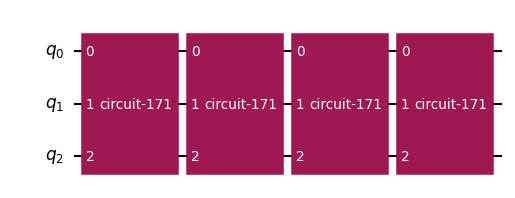

In [7]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

def create_ansatz(num_qubits):
    """Create a parameterized ansatz circuit.

    Args:
        num_qubits (int): Number of qubits in the circuit.

    Returns:
        QuantumCircuit: The parameterized ansatz circuit.
    """
    qc = QuantumCircuit(num_qubits)

    # Apply gates
    for q in range(num_qubits):
        qc.h(q)  # Apply Hadamard gate
        qc.cx(q, (q + 1) % num_qubits)  # Apply CNOT gate (cyclic)

    return qc

def create_vvqc_with_ansatz(num_qubits, depth):
    """Create a variable depth quantum circuit using a canonical ansatz.

    Args:
        num_qubits (int): Number of qubits in the circuit.
        depth (int): Depth of the quantum circuit (number of repetitions of the ansatz).

    Returns:
        QuantumCircuit: The constructed variable depth quantum circuit.
    """
    base_circuit = create_ansatz(num_qubits)
    qc = QuantumCircuit(num_qubits)

    # Add the ansatz circuit multiple times
    for _ in range(depth):
        qc.append(base_circuit, range(num_qubits))

    return qc

def visualize_circuit(circuit):
    """Visualize the quantum circuit.

    Args:
        circuit (QuantumCircuit): The quantum circuit to be visualized.

    Returns:
        None
    """
    # Display the circuit diagram
    fig, ax = plt.subplots(1, 1)
    ax.axis('off')
    circuit.draw(output='mpl', ax=ax, scale=0.8)  # Adjust scale as needed
    plt.show()

# Example usage
num_qubits = 3  # Number of qubits
depth = 4  # Depth of the quantum circuit

qc = create_vvqc_with_ansatz(num_qubits, depth)
visualize_circuit(qc)


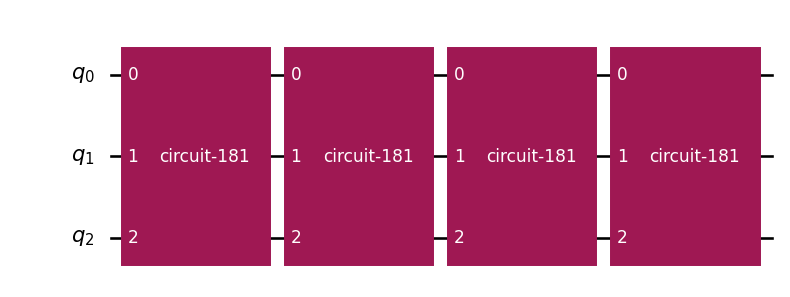

In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

def create_ansatz(num_qubits):
    """Create a parameterized ansatz circuit.

    Args:
        num_qubits (int): Number of qubits in the circuit.

    Returns:
        QuantumCircuit: The parameterized ansatz circuit.
    """
    qc = QuantumCircuit(num_qubits)

    # Apply gates
    for q in range(num_qubits):
        qc.h(q)  # Apply Hadamard gate
        qc.cx(q, (q + 1) % num_qubits)  # Apply CNOT gate (cyclic)

    return qc

def create_vvqc_with_ansatz(num_qubits, depth):
    """Create a variable depth quantum circuit using a canonical ansatz.

    Args:
        num_qubits (int): Number of qubits in the circuit.
        depth (int): Depth of the quantum circuit (number of repetitions of the ansatz).

    Returns:
        QuantumCircuit: The constructed variable depth quantum circuit.
    """
    base_circuit = create_ansatz(num_qubits)
    qc = QuantumCircuit(num_qubits)

    # Add the ansatz circuit multiple times
    for _ in range(depth):
        qc.append(base_circuit, range(num_qubits))

    return qc

# Example usage
num_qubits = 3  # Number of qubits
depth = 4  # Depth of the quantum circuit

qc = create_vvqc_with_ansatz(num_qubits, depth)

# Visualize the quantum circuit
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.axis('off')
img = circuit_drawer(qc, output='mpl', ax=ax, scale=0.8)
plt.tight_layout()
plt.show()
